<a href="https://colab.research.google.com/github/IsabelaAyres/IsabelaAyres/blob/main/MVP_Analise_de_Dados_e_Boas_Praticas_Isabela_Ayres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

>**PUC-Rio**
>
>**Pós-Graduação em Ciência de Dados e Analytics**
>
>**Aluna: Isabela Ayres**

## 1. Definição do Problema 

---



Contexto do problema, motivo da escolha do dataset e principais informações a respeito dos atributos.

### 1.1 Contexto

A estratégia "cliente no centro" tem sido cada vez mais explorada e vista como um importante instrumento para o crescimento e sucesso das empresas nos dias de hoje.

Esta abordagem significa que todas as decisões tomadas pela empresa são baseadas nas necessidades e desejos do cliente, colocando-o no centro de todas as atividades da empresa.

Há muitas razões pelas quais as empresas devem implementar esta estratégia, e uma das principais é a **fidelização do cliente**.

Quando os clientes sentem que suas necessidades estão sendo atendidas e que a empresa se importa com eles, é mais provável que eles permaneçam leais à marca. 

Portanto, uma abordagem "cliente no centro" é valiosa pois:


* Ajuda a fidelizar o cliente e atrair novos consumidores;
* Melhora a experiência do cliente, resultando em avaliações positivas e feedbacks;
* Identifica oportunidades de mercado e possibilita a criação de produtos e serviços diferenciados;
* Melhora os processos internos, reduzindo custos e aumentando a rentabilidade.

Nesse contexto, este MVP tem como objetivo realizar uma análise exploratória com o objetivo de identificar quais os principais atributos que levam um cliente classificar sua experiência como Satisfatória, para, então, auxiliar a empresa a concentrar esforços e investimentos no que agrega mais valor ao cliente, visando maior eficiência, redução de custos e, finalmente, a um aumento da rentabilidade.





### 1.1 Escolha do dataset

O dataset usado neste projeto será o **Passenger Satisfaction**, referente a uma pesquisa aplicada nos Estados Unidos que mede o nível de satisfação sobre companhias aéreas.


Link do dataset: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

### 1.3 Informações sobre os atributos

O dataset possui 129.880 instâncias e 24 atributos, conforme descrições abaixo. 

1. **Satisfaction**: Nível de satisfação com a companhia aérea
2. **Age**: Idade dos passageiros
3. **Gender**: Gênero dos passageiros
4. **Type of Travel**: Propósito da viagem dos passageiros
5. **Class**: Classe de viagem no avião dos passageiros
6. **Customer Type**: Tipo de cliente (Cliente leal, Cliente não leal)
7. **Flight distance**: Distância do voo
8. **Inflight wifi service**: Nível de satisfação do serviço de wifi a bordo
9. **Ease of Online booking**: Nível de satisfação da reserva online
10. **Online boarding**: Nível de satisfação do embarque online
11. **Inflight entertainment**: Nível de satisfação do entretenimento a bordo
12. **Food and drink**: Nível de satisfação da comida e bebida
13. **Seat comfort**: Nível de satisfação do conforto do assento
14. **On-board service**: Nível de satisfação do serviço a bordo
15. **Leg room service**: Nível de satisfação do serviço de espaço para as pernas
16. **Departure/Arrival time convenient**: Nível de satisfação da conveniência do horário de partida/chegada
17. **Baggage handling**: Nível de satisfação do serviço de manuseio de bagagem
18. **Gate location**: Nível de satisfação da localização do portão de embarque
19. **Cleanliness**: Nível de satisfação da limpeza
20. **Check-in service**: Nível de satisfação do serviço de check-in
21. **Departure Delay in Minutes**: Minutos de atraso na partida
22. **Arrival Delay in Minutes**: Minutos de atraso na chegada
23. **Online support**: Suporte online
24. **ID**: Número de identificação do passageiro

Em que, para os atributos de Nível de Satisfação, as notas variam de 1 a 5, sendo 0 não-aplicável.



## 2. Pré-processamento de dados 

---
O pré-processamento dos dados consiste em compreender os dados e detectar possíveis lacunas na análise por meio da avaliação dos tipos dos atributos, identificação de valores discrepantes ou faltantes, dentre outros fatores relevantes.

Essa etapa é crucial para reconhecer as necessidades de tratamento dos dados, possibilitando uma análise exploratória mais precisa e eficiente.

### 2.1 Imports

Começando pela importação das bibliotecas a serem utilizadas.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix


# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2 Carga

Será utilizado o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv com cabeçalho disponível online.

In [ ]:
# Carregando um arquivo csv usando Pandas através de uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/IsabelaAyres/datascience/main/MVP_data_analysis_and_best_practices/satisfaction.csv"

# Ajusta o cabeçalho das colunas para nomes padronizados, sem espaços
colunas = ['id',	'Satisfaction',	'Gender',	'CustomerType',	'Age',	'TypeTravel',	'Class',	'FlightDistance',	'Seatcomfort',	'DepartureArrivalTimeConvenient',	'FoodDrink',	'GateLocation',	'InflightWifiService',	'InflightEntertainment',	'OnlineSupport',	'EaseOnlinebooking',	'OnboardService',	'LegRoomService',	'BaggageHandling',	'CheckinService',	'Cleanliness',	'OnlineBoarding',	'DepartureDelayMinutes',	'ArrivalDelayMinutes']

# Lê o arquivo utilizando as colunas informadas
df_original = pd.read_csv(url,
                          names=colunas,
                          skiprows=1,
                          delimiter=',')

Para verificar a existência de possíveis erros no carregamento do dataset, é recomendável analisar as 10 primeiras e últimas linhas dos dados. Essa avaliação pode ajudar a identificar inconsistências e discrepâncias, permitindo a adoção de medidas corretivas para garantir a qualidade e confiabilidade dos resultados obtidos a partir do dataset.

In [ ]:
# Mostra as 10 primeiras linhas do dataset
df_original.head(10)

,id,Satisfaction,Gender,CustomerType,Age,TypeTravel,Class,FlightDistance,Seatcomfort,DepartureArrivalTimeConvenient,...,OnlineSupport,EaseOnlinebooking,OnboardService,LegRoomService,BaggageHandling,CheckinService,Cleanliness,OnlineBoarding,DepartureDelayMinutes,ArrivalDelayMinutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [ ]:
# Mostra as 10 últimas linhas do dataset
df_original.tail(10)

,id,Satisfaction,Gender,CustomerType,Age,TypeTravel,Class,FlightDistance,Seatcomfort,DepartureArrivalTimeConvenient,...,OnlineSupport,EaseOnlinebooking,OnboardService,LegRoomService,BaggageHandling,CheckinService,Cleanliness,OnlineBoarding,DepartureDelayMinutes,ArrivalDelayMinutes
129870,22432,satisfied,Female,disloyal Customer,70,Personal Travel,Eco,1674,5,4,...,5,5,3,2,4,5,4,5,54,46.0
129871,91851,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,41573,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129873,46936,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,...,3,3,5,2,5,3,5,3,7,NaN
129874,53969,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129879,84566,neutral or dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,...,3,4,5,5,5,3,3,3,185,186.0


A partir da verificação das 10 primeiras e últimas linhas do dataset, bem como seu tamanho (vide comando abaixo), nota-se que todas as instâncias e atributos foram carregados com sucesso.

In [ ]:
# Mostra as dimensões do dataset
print(df_original.shape)

(129880, 24)


Também é importante verificar as informações gerais presentes no dataset.

In [ ]:
# Mostra as informações do dataset
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              129880 non-null  int64  
 1   Satisfaction                    129880 non-null  object 
 2   Gender                          129880 non-null  object 
 3   CustomerType                    129880 non-null  object 
 4   Age                             129880 non-null  int64  
 5   TypeTravel                      129880 non-null  object 
 6   Class                           129880 non-null  object 
 7   FlightDistance                  129880 non-null  int64  
 8   Seatcomfort                     129880 non-null  int64  
 9   DepartureArrivalTimeConvenient  129880 non-null  int64  
 10  FoodDrink                       129880 non-null  int64  
 11  GateLocation                    129880 non-null  int64  
 12  InflightWifiServ

### 2.3 Tratamento de Missings e Limpeza

Ao observar a relação de valores faltantes no dataset, nota-se que o atributo **ArrivalDelayMinutes**, referente ao tempo de atraso em minutos na chegada ao destino, apresenta aproximadamente 0,30% (393 registros) de dados faltantes.
Nesse sentido, foi decidido que esses registros serão desconsiderados da análise devido à baixa representatividade em relação ao total, a fim de garantir a integridade e confiabilidade dos resultados obtidos a partir do dataset.

In [ ]:
# Verificando nulls no dataset
df_original.isnull().sum()

id                                  0
Satisfaction                        0
Gender                              0
CustomerType                        0
Age                                 0
TypeTravel                          0
Class                               0
FlightDistance                      0
Seatcomfort                         0
DepartureArrivalTimeConvenient      0
FoodDrink                           0
GateLocation                        0
InflightWifiService                 0
InflightEntertainment               0
OnlineSupport                       0
EaseOnlinebooking                   0
OnboardService                      0
LegRoomService                      0
BaggageHandling                     0
CheckinService                      0
Cleanliness                         0
OnlineBoarding                      0
DepartureDelayMinutes               0
ArrivalDelayMinutes               393
dtype: int64

Antes de qualquer atualização, será feita uma cópia do dataset, para preservação dos dados originais.

In [ ]:
# Salva um novo dataset
df = df_original


Analisando os dados faltantes graficamente.

In [ ]:
# Exibe visualização matricial da nulidade do dataset
ms.matrix(df)


<Axes: >

o comando abaixo deleta os valores faltantes do respectivo atributo.

In [ ]:
# Deleta os missings do atributo definido anteriormente
df = df.dropna(subset=['ArrivalDelayMinutes'])

Ao visualizar a matriz, é possível notar que todos os valores faltantes foram tratados adequadamente, garantindo a qualidade e a confiabilidade dos dados. Esse processo é essencial para evitar resultados imprecisos e inconsistências na análise do dataset.

In [ ]:
# Exibe visualização matricial da nulidade do dataset
ms.matrix(df)

<Axes: >

Conforme mencionado anteriormente, os atributos de Nível de Satisfação variam de 1 a 5, sendo 0 não aplicável. Para garantir uma interpretação mais precisa e confiável dos dados, é recomendável converter os valores 0 para "não aplicável". Dessa forma, a análise será mais clara e evitará possíveis ambiguidades nos resultados.

In [ ]:
# Substitui valores zero por "não aplicável"
df.Seatcomfort = df.Seatcomfort.replace(0, np.nan)
df.DepartureArrivalTimeConvenient = df.DepartureArrivalTimeConvenient.replace(0, np.nan)
df.FoodDrink = df.FoodDrink.replace(0, np.nan)
df.GateLocation = df.GateLocation.replace(0, np.nan)
df.InflightWifiService = df.InflightWifiService.replace(0, np.nan)	
df.InflightEntertainment = df.InflightEntertainment.replace(0, np.nan)
df.OnlineSupport = df.OnlineSupport.replace(0, np.nan)	 
df.EaseOnlinebooking = df.EaseOnlinebooking.replace(0, np.nan)
df.OnboardService = df.OnboardService.replace(0, np.nan)
df.LegRoomService = df.LegRoomService.replace(0, np.nan)
df.BaggageHandling = df.BaggageHandling.replace(0, np.nan)
df.CheckinService = df.CheckinService.replace(0, np.nan)
df.Cleanliness = df.Cleanliness.replace(0, np.nan)	
df.OnlineBoarding = df.OnlineBoarding.replace(0, np.nan)

### 2.4 Conversão de tipo de dados

Ao considerar o tipo de variável dos atributos, é possível converter o atributo **id**, que representa o código de identificação do passageiro, de um formato numérico para um formato textual. Essa conversão pode ajudar a evitar possíveis erros na análise.


In [ ]:
# Converte para um formato textual
df.id = df.id.astype(object)


Com o comando abaixo, é possível observar que a conversão foi realizada com sucesso.

In [ ]:
# Verifica o tipo de dataset de cada atributo
df.dtypes

id                                 object
Satisfaction                       object
Gender                             object
CustomerType                       object
Age                                 int64
TypeTravel                         object
Class                              object
FlightDistance                      int64
Seatcomfort                       float64
DepartureArrivalTimeConvenient    float64
FoodDrink                         float64
GateLocation                      float64
InflightWifiService               float64
InflightEntertainment             float64
OnlineSupport                     float64
EaseOnlinebooking                 float64
OnboardService                    float64
LegRoomService                    float64
BaggageHandling                     int64
CheckinService                    float64
Cleanliness                       float64
OnlineBoarding                    float64
DepartureDelayMinutes               int64
ArrivalDelayMinutes               

### 2.5 Tratamento de Outliers

Ao analisar as informações presentes no resumo estatístico do dataset, não foi identificado nenhum resultado que possa ser considerado um outlier. Essa verificação é importante para garantir que os dados estejam dentro de um intervalo aceitável e representem adequadamente a realidade do contexto estudado.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

,Age,FlightDistance,Seatcomfort,DepartureArrivalTimeConvenient,FoodDrink,GateLocation,InflightWifiService,InflightEntertainment,OnlineSupport,EaseOnlinebooking,OnboardService,LegRoomService,BaggageHandling,CheckinService,Cleanliness,OnlineBoarding,DepartureDelayMinutes,ArrivalDelayMinutes
count,129487.000000,129487.000000,124706.000000,122843.000000,123565.000000,129485.000000,129357.000000,126519.000000,129486.000000,129469.000000,129482.000000,129045.000000,129487.000000,129486.000000,129482.000000,129473.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.947412,3.152007,2.988710,2.990424,3.252425,3.463124,3.519994,3.472654,3.465277,3.498059,3.695460,3.340755,3.706029,3.352908,14.643385,15.091129
std,15.117597,1026.884131,1.301429,1.395942,1.332404,1.305874,1.315397,1.256664,1.306294,1.305021,1.270597,1.278052,1.156487,1.260532,1.151475,1.298226,37.932867,38.465650
min,7.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 3. Análise de dados

---

Após a conclusão dos devidos pré-processamentos, o dataset está pronto para análise em busca de insights relevantes.

### 3.1 Paleta de cores

A definição da paleta de cores é uma etapa relevante no processo de visualização de dados, uma vez que possibilita a customização de acordo com a identidade visual do cliente ou empresa e também é uma forma de inclusão para pessoas com problemas visuais.

No contexto deste trabalho, foi escolhida a paleta de cores Viridis, que é reconhecida por sua robustez em relação a pessoas com daltonismo, garantindo a acessibilidade dos dados a todos os usuários.

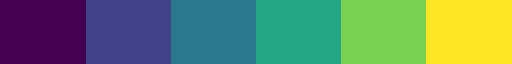

In [ ]:
# Define paleta de cores
vcmap = plt.get_cmap("viridis", 6)

# Exibe o mapa de cores
display(vcmap)

Será realizada a conversão do mapa de cores em um vetor, a fim de possibilitar a utilização das cores de forma individualizada. Ademais, serão aplicadas algumas customizações no visual, com o intuito de aprimorar sua estética e usabilidade.

In [ ]:
# converte o mapa de cores em um vetor, para uso de cores individuais e extrai lista de cores em hex
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)]
display(coresViridis)

# Define uma cor default como sendo a segunda cor da paleta
corDefault = coresViridis[1]

# Carrega uma folha de estilos, para estética otimizada
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos, para estética otimizada
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)


['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

### 3.2 Entendendo o perfil dos entrevistados

Iniciando a exploração do dataset analisando o perfil dos entrevistados. 

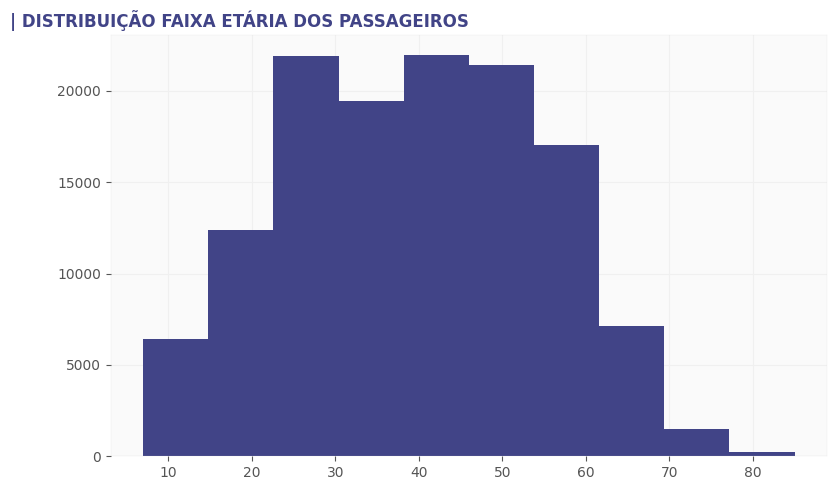

In [ ]:
# Histograma
df.Age.hist(figsize = (8,5),
            color = corDefault)

# Acrescenta um título ao gráfico
plt.title('| DISTRIBUIÇÃO FAIXA ETÁRIA DOS PASSAGEIROS',
             fontsize = 'large',
             fontweight = "bold",
             color = '#414487',
             horizontalalignment = 'right')

# Plota o gráfico
plt.tight_layout()
plt.show()

> A maioria dos respondentes está na faixa dos 20 a 40 anos, o que pode sugerir que esse grupo etário é mais propenso a utilizar serviços de companhias aéreas.
>
>É interessante notar que o número de respondentes diminui drasticamente após os 50 anos, o que pode indicar que essa faixa etária viaja menos de avião ou é menos propensa a participar de pesquisas de satisfação.
>
>A quantidade de respondentes com idades entre 7 e 19 anos é relativamente alta, o que pode sugerir que a companhia aérea tem uma presença significativa entre os passageiros mais jovens.


Pode-se vericar também o índice de Lealdade dos passageiros, bem como suas preferências de Tipo e Classe de viagem.

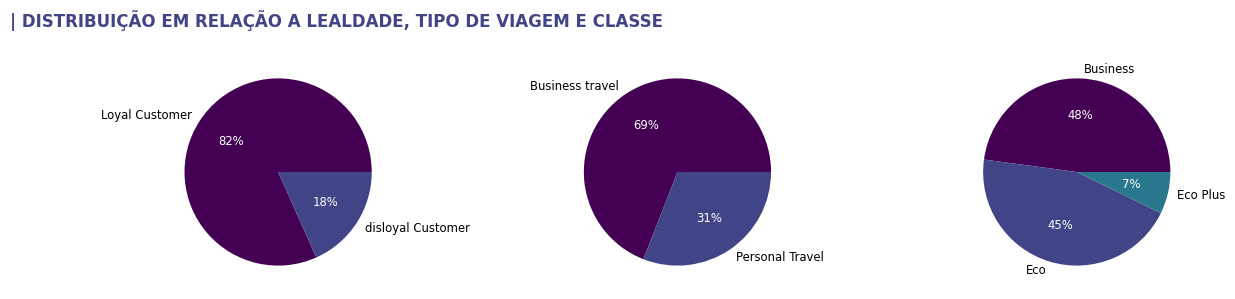

In [ ]:
# Configura o layout de exibição
fig, ax = plt.subplots(figsize = (12, 3),
                       nrows = 1,
                       ncols = 3)

## Gráfico de pizza para mostrar distribuição do atributo CustomerType
# Define valores do atributo a ser considerado
labels1 = df['CustomerType'].value_counts().index
values1 = df['CustomerType'].value_counts().values

# Cria gráfico
patches, texts, autotexts = ax[0].pie(values1,
                                      labels=labels1,
                                      autopct='%.0f%%',
                                      textprops={'size': 'smaller'},
                                      colors = coresViridis)

# Ajusta a cor dos valores da porcentagem
for ins in autotexts:
    ins.set_color('white')


# Gráfico de pizza para mostrar distribuição do atributo TypeTravel
# Define valores do atributo a ser considerado
labels2 = df['TypeTravel'].value_counts().index
values2 = df['TypeTravel'].value_counts().values

# Cria gráfico
patches, texts, autotexts = ax[1].pie(values2,
                                      labels=labels2,
                                      autopct='%.0f%%',
                                      textprops={'size': 'smaller'},
                                      colors = coresViridis)

# Ajusta a cor dos valores da porcentagem
for ins in autotexts:
    ins.set_color('white')


# Gráfico de pizza para mostrar distribuição do atributo Class
# Define valores do atributo a ser considerado
labels3 = df['Class'].value_counts().index
values3 = df['Class'].value_counts().values

# Cria gráfico
patches, texts, autotexts = ax[2].pie(values3,
                                      labels=labels3,
                                      autopct='%.0f%%',
                                      textprops={'size': 'smaller'},
                                      colors = coresViridis)

# Ajusta a cor dos valores da porcentagem
for ins in autotexts:
    ins.set_color('white')


# Acrescenta um título ao gráfico
plt.suptitle('| DISTRIBUIÇÃO EM RELAÇÃO A LEALDADE, TIPO DE VIAGEM E CLASSE',
             fontsize = 'large',
             fontweight="bold",
             color = '#414487',
             horizontalalignment = 'right')


# Plota o gráfico
plt.tight_layout()
plt.show()

>A alta porcentagem de clientes leais (82%) sugere que a maioria dos respondentes está satisfeita com os serviços e produtos oferecidos.
>
>Além disso, os dados indicam uma forte presença no mercado de viagens de negócios, que contempla 69% do total.
>
>A distribuição das classes de viagem sugere que a maioria dos respondentes viaja em classe econômica (45%), enquanto uma porcentagem significativa viaja em classe de negócios (48%). A classe Eco Plus, por outro lado, aparenta não ser tão popular entre os passageiros, correspondendo a apenas 7%.

É interessante verificar a relação entre a idade do passageiro e a escolha da Classe de viagem.

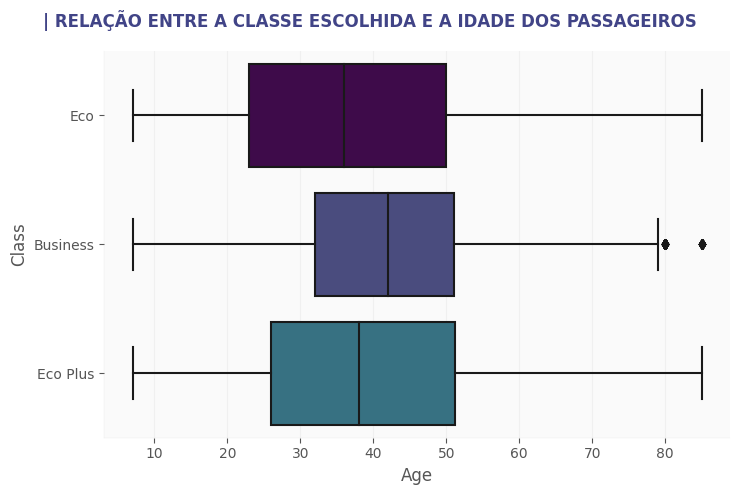

In [ ]:
# Cria gráfico boxpot
sns.catplot(x='Age',
            y='Class',
            data=df,
            kind='box',
            height=5,
            aspect=1.5,
            palette= coresViridis)

# Acrescenta um título ao gráfico
plt.suptitle('| RELAÇÃO ENTRE A CLASSE ESCOLHIDA E A IDADE DOS PASSAGEIROS',
             fontsize = 'large',
             fontweight="bold",
             color = '#414487',
             horizontalalignment = 'center')

# Plota o gráfico
plt.tight_layout()
plt.show()

> A a maioria dos clientes da classe Business está concentrada na faixa etária de 35 a 50 anos, o que pode ser explicado pelo fato de haver mais profissionais ativos nessa faixa etária. 
>
> Quanto às outras classes, observou-se que as pessoas mais idosas demonstraram uma ligeira preferência pela classe Eco Plus.

### 3.3 Entendendo o relacionamento entre os dados

Em uma análise exploratória de dados, entender como uma variável se comporta em relação a outra pode ser o ponto chave para extrair insights valiosos. 

Nesse sentido, será explorada a distribuição das avaliações por atributo.

In [ ]:
# Cria lista com os atributos
atributos = ['Seatcomfort', 'DepartureArrivalTimeConvenient', 'FoodDrink', 'GateLocation', 'InflightWifiService', 'InflightEntertainment','OnlineSupport', 'EaseOnlinebooking', 'OnboardService', 'LegRoomService', 'BaggageHandling', 'CheckinService', 'Cleanliness', 'OnlineBoarding']

# Cria dataset com os artributos selecionados
df2 = df[atributos]

# Transforma colunas em linhas
df2 = df2.melt(var_name='Atributo', 
               value_name='Nota')

df2.tail(10)

,Atributo,Nota
1812808,OnlineBoarding,1.0
1812809,OnlineBoarding,5.0
1812810,OnlineBoarding,2.0
1812811,OnlineBoarding,4.0
1812812,OnlineBoarding,2.0
1812813,OnlineBoarding,2.0
1812814,OnlineBoarding,1.0
1812815,OnlineBoarding,2.0
1812816,OnlineBoarding,2.0
1812817,OnlineBoarding,3.0


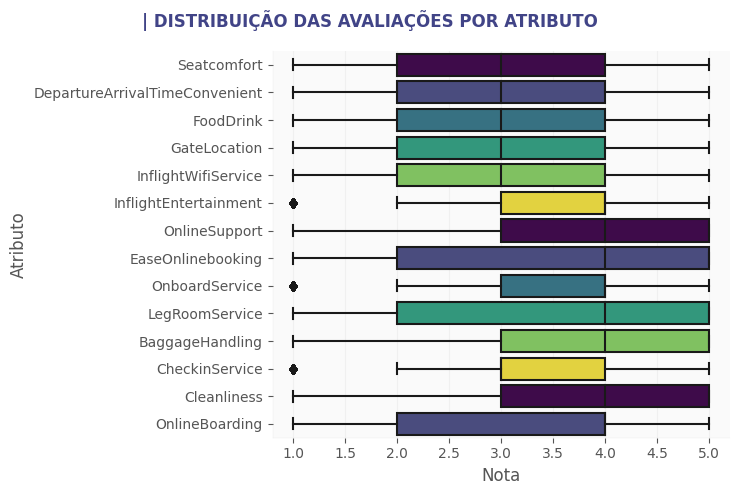

In [ ]:
# Cria gráfico boxpot
sns.catplot(x='Nota',
            y='Atributo',
            data=df2,
            kind='box',
            height=5,
            aspect=1.5,
            palette= coresViridis)

# Acrescenta um título ao gráfico
plt.suptitle('| DISTRIBUIÇÃO DAS AVALIAÇÕES POR ATRIBUTO',
             fontsize = 'large',
             fontweight="bold",
             color = '#414487',
             horizontalalignment = 'center')

# Plota o gráfico
plt.tight_layout()
plt.show()

> E um primeiro momento, os dados levam a crer que possível perceber que o Suporte Online , Manuseio de Bagagem e Limpeza são atributos chaves por terem mais concentração de notas maior ou igual a 4.
>
> No entando, vale ressaltar que a consideração final de Satisfação deve ser contemplada para uma análise mais assertiva, que será abordada a seguir.



Com o objetivo de identificar quais atributos mais influenciam na percepção de Satisfação dos passageiros, será explorado o relaciomento entre a **a satisfação alta (igual a 5) de cada tributo** com o **resultado final de satisfação** do passageiro.


Primeiramente, será necessário selecionar apenas as colunas pertinentes.

Como cada tipo de objeto avaliado está em uma coluna diferente, será necessário transformar essas colunas em linhas para viabilizar a análise,

In [ ]:
# Cria lista com as colunas necessárias para a análise
colunas = ['Satisfaction', 'Seatcomfort', 'DepartureArrivalTimeConvenient', 'FoodDrink', 'GateLocation', 'InflightWifiService', 'InflightEntertainment','OnlineSupport', 'EaseOnlinebooking', 'OnboardService', 'LegRoomService', 'BaggageHandling', 'CheckinService', 'Cleanliness', 'OnlineBoarding']

# Cria dataset com os artritos selecionados
df3 = df[colunas]

# Transforma colunas em linhas
df3 = df3.melt(id_vars=['Satisfaction'],
               var_name='Atributo',
               value_name='Nota')

df3.tail(10)

,Satisfaction,Atributo,Nota
1812808,satisfied,OnlineBoarding,1.0
1812809,satisfied,OnlineBoarding,5.0
1812810,satisfied,OnlineBoarding,2.0
1812811,satisfied,OnlineBoarding,4.0
1812812,satisfied,OnlineBoarding,2.0
1812813,satisfied,OnlineBoarding,2.0
1812814,neutral or dissatisfied,OnlineBoarding,1.0
1812815,neutral or dissatisfied,OnlineBoarding,2.0
1812816,neutral or dissatisfied,OnlineBoarding,2.0
1812817,neutral or dissatisfied,OnlineBoarding,3.0


Com as devidas colunas selecionadas, será filtrado apenas os resultados com avaliação alta (Nota = 5).

In [ ]:
# Filtra Nota = 5
df3 = df3[df3['Nota'] == 5]

df3.tail(10)

,Satisfaction,Atributo,Nota
1812777,neutral or dissatisfied,OnlineBoarding,5.0
1812787,neutral or dissatisfied,OnlineBoarding,5.0
1812789,neutral or dissatisfied,OnlineBoarding,5.0
1812791,neutral or dissatisfied,OnlineBoarding,5.0
1812793,neutral or dissatisfied,OnlineBoarding,5.0
1812794,neutral or dissatisfied,OnlineBoarding,5.0
1812796,neutral or dissatisfied,OnlineBoarding,5.0
1812799,neutral or dissatisfied,OnlineBoarding,5.0
1812806,satisfied,OnlineBoarding,5.0
1812809,satisfied,OnlineBoarding,5.0


Após a correta filtragem dos dados, a coluna Nota já não é mais necessária, visto que terá sempre o mesmo número. Portanto, será excluída.

In [ ]:
# Elimina coluna Nota
df3 = df3.drop(['Nota'], axis=1)

df3.tail(10)

,Satisfaction,Atributo
1812777,neutral or dissatisfied,OnlineBoarding
1812787,neutral or dissatisfied,OnlineBoarding
1812789,neutral or dissatisfied,OnlineBoarding
1812791,neutral or dissatisfied,OnlineBoarding
1812793,neutral or dissatisfied,OnlineBoarding
1812794,neutral or dissatisfied,OnlineBoarding
1812796,neutral or dissatisfied,OnlineBoarding
1812799,neutral or dissatisfied,OnlineBoarding
1812806,satisfied,OnlineBoarding
1812809,satisfied,OnlineBoarding


Com os dados devidamente tratados, é possível utilizar um comando para mostrar o percentual de respostas Satisfeito x Neutro ou Insatisfeito.

In [ ]:
# Cria uma tabela cross com a proporção de cada resultado
df3 = pd.crosstab(index=df3['Atributo'],
                  columns=df3['Satisfaction'],
                  normalize="index")*100
df3

Satisfaction,neutral or dissatisfied,satisfied
Atributo,,
BaggageHandling,26.418325,73.581675
CheckinService,26.423716,73.576284
Cleanliness,26.830154,73.169846
DepartureArrivalTimeConvenient,44.355050,55.644950
EaseOnlinebooking,23.450079,76.549921
FoodDrink,21.991619,78.008381
GateLocation,34.452066,65.547934
InflightEntertainment,4.793600,95.206400
InflightWifiService,33.088593,66.911407


Pode-se eliminar a coluna Neutro ou Insatisfeito, para o foco ser no resultado positivo.

In [ ]:
# Eliminando coluna 'neutral or dissatisfied'
df3 = df3.drop(['neutral or dissatisfied'], axis=1)

# Classificando crescente
df3 = df3.sort_values('satisfied',
                      ascending=False)

# Ajustando casa decimal
df3 = df3.round(0)


Com os dados prontos, pode-se criar uma tabela com formatação customizada para facilmente identificar os atributos de maior peso.

In [ ]:
## Cria tabela customizda
# Define mapa de cor
cm = plt.get_cmap("viridis_r")

# Configura tabela utilizando CSS para atribuir fundo degradê na coluna de resultados
th_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', 'black'),
  ('background-color', '#f7f7f9')
  ]

td_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('width', '5px'),
  ]

caption_props =  [
    ("text-align", "left"),
    ("font-size", "15px"),
    ("font-weight", "bold"),
    ('color', '#414487')
    ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=caption_props)
  ]

# Exibe tabela
(df3.style 
  .background_gradient(cmap=cm, subset=['satisfied'])
  .set_caption('| ATRIBUTOS QUE MAIS INFLUENCIAM NA SATISFAÇÃO FINAL DO PASSAGEIRO')
  .set_table_styles(styles))

Satisfaction,satisfied
Atributo,
Seatcomfort,99.000000
InflightEntertainment,95.000000
FoodDrink,78.000000
OnlineSupport,77.000000
OnboardService,77.000000
EaseOnlinebooking,77.000000
BaggageHandling,74.000000
CheckinService,74.000000
OnlineBoarding,73.000000


> A partir da análise dos resultados, nota-se que **99%** das pessoas que deram avaliação alta para **Conforto do Assento** e **95%** das pessoas que deram avaliação alta para **Entretenimento durante o Voo** classificaram a experiência total como Satisfatória.
>
> Essa informação pode ser uma ferramenta poderosa para o desenvolvimento de produtos e serviços que atendam a essas necessidades,  permitindo, assim, destacar-se em relação à concorrência e alcançar um crescimento mais rápido.
> 
> Além disso, houve uma representatividade alta para **Comida e Bebida, Suporte Online e Serviço de Bordo**. Essa informação é valiosa para orientar ações futuras, permitindo a correta priorização dos aspectos mais relevantes para os clientes.

## 4. Conclusão
---
Principais insights obtidos através do estudo.

Em uma era em que a quantidade de dados gerados é cada vez maior, é crucial saber como utilizá-los para construir soluções com alto valor agregado e custos otimizados.

Nesse contexto, o objetivo deste MVP foi realizar uma análise exploratória dos dados de uma pesquisa de satisfação sobre a experiência de passageiros em viagens aéreas.

Por meio dessa análise, foram identificadas características relacionadas à faixa etária dos passageiros, bem como ao tipo e classe de viagem mais frequentes.

O insight mais relevante foi a identificação dos atributos que mais influenciam na satisfação final do passageiro, que era o objetivo principal do estudo. Essa informação é primordial para que as decisões possam ser tomadas na ordem correta de prioridade, otimizando recursos e custos, além de alcançar a satisfação do cliente.